In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784')
X = mnist.data.to_numpy()  
y = mnist.target.astype(np.uint8)

In [3]:
X_normalized = X / 255.0
cov_matrix = np.cov(X_normalized.T)

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
num_components = 50
top_eigenvectors = eigenvectors[:, :num_components]

In [5]:
X_pca = np.dot(X_normalized, top_eigenvectors)

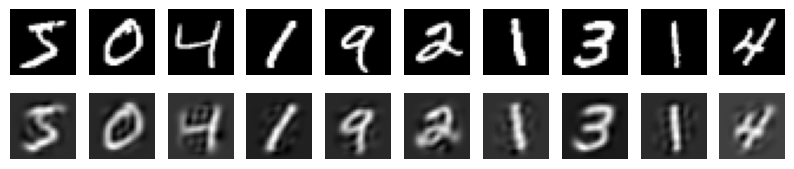

In [6]:
fig, axes = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    axes[0, i].imshow(X[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow((np.dot(top_eigenvectors, X_pca[i]) * 255).reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
plt.show()